In [42]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_csv = "data/mouse_drug_data.csv"
clinical_trial_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_csv)
clinical_trial_df = pd.read_csv(clinical_trial_csv)

# Combine the data into a single dataset
mouse_clinical_merge = pd.merge(mouse_drug_df, clinical_trial_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_clinical_merge.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [43]:
# are there duplicates? -- yes, mouse g989
dup_mouse = clinical_trial_df.loc[clinical_trial_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [44]:
#remove duplicates
clinical_trial_df = clinical_trial_df.drop_duplicates('Mouse ID')
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [45]:
# Sort based on Timepoint
timepoint_data = mouse_clinical_merge.sort_values("Timepoint", ascending=True)

#Reset the index
data_by_timepoint = timepoint_data.reset_index()
del data_by_timepoint['index']
data_by_timepoint.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0
1,f932,Ketapril,0,45.0,0
2,a788,Zoniferol,0,45.0,0
3,g107,Ketapril,0,45.0,0
4,a457,Ketapril,0,45.0,0


## Tumor Response to Treatment

In [46]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# mouse_clinical_merge.groupby("Drug")["Timepoint"].count()
mouse_drug_timepoint = mouse_clinical_merge.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]
mouse_drug_timepoint_mean = mouse_drug_timepoint.groupby(["Drug", "Timepoint"]).mean()
mouse_drug_timepoint_mean.head()
# Convert to DataFrame
# df = pd.DataFrame.from_dict(sales)
df = pd.DataFrame.from_dict(mouse_drug_timepoint_mean)
# Preview DataFrame
df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [47]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = mouse_drug_timepoint.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
df_standard_error = pd.DataFrame.from_dict(mouse_drug_timepoint)
# Preview DataFrame
df_standard_error.head()

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Stelasyn,45.000000
1,5,Stelasyn,47.313491
2,10,Stelasyn,47.904324
3,15,Stelasyn,48.735197
4,20,Stelasyn,51.112713


In [48]:
#example

In [49]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


<function matplotlib.pyplot.show(*args, **kw)>

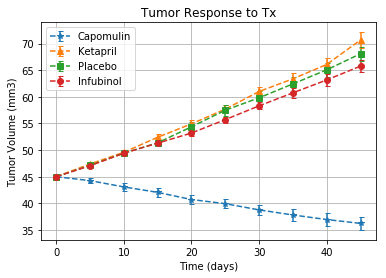

In [50]:
# Generate the Plot (with Error Bars)
#errorbars -- https://www.mathworks.com/matlabcentral/answers/317051-how-do-i-add-error-bars-to-scatter-plots
plt.errorbar(np.arange(0, 50, 5), mouse_drug_timepoint_mean.loc["Capomulin", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Capomulin", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), mouse_drug_timepoint_mean.loc["Ketapril", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Ketapril", "Tumor Volume (mm3)"], fmt = '^--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), mouse_drug_timepoint_mean.loc["Placebo", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Placebo", "Tumor Volume (mm3)"], fmt = 's--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), mouse_drug_timepoint_mean.loc["Infubinol", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Infubinol", "Tumor Volume (mm3)"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

#axis & title
plt.title('Tumor Response to Tx')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

#add gridlines
# https://stackoverflow.com/questions/42593104/convert-list-into-a-pandas-data-frame
plt.grid(True)

#add legend
# https://www.mathworks.com/help/matlab/ref/legend.html
plt.legend(loc="best")

# Save the Figure
plt.show



## Metastatic Response to Treatment

In [58]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mouse_met = mouse_clinical_merge.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]
mouse_met_mean = mouse_clinical_merge.groupby(["Drug", "Metastatic Sites"]).mean()
mouse_met_mean.head()
# Convert to DataFrame
df_met = pd.DataFrame.from_dict(mouse_met_mean)
# Preview DataFrame
df_met.head()

Timepoint  Tumor Volume (mm3)
Drug      Metastatic Sites                               
Capomulin 0                 13.220339           42.098476
          1                 28.283582           39.479840
          2                 32.631579           39.639961
          3                 37.857143           33.761781
Ceftamin  0                  7.985075           47.888330

In [6]:
#example

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


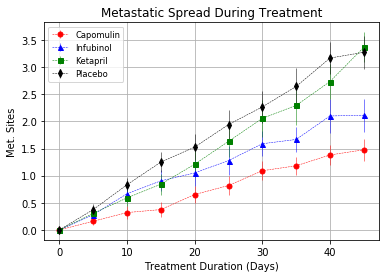

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

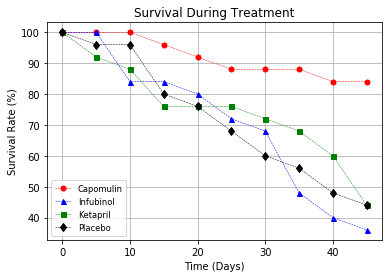

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

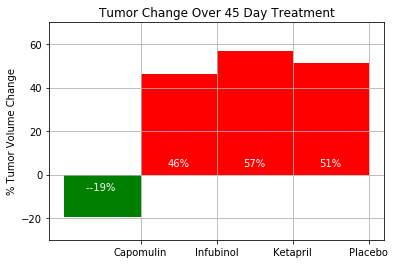